<a href="https://colab.research.google.com/github/LavanyaPobbathi/Lavanya_INFO5731_Fall2023/blob/main/In_class_exercise/Pobbathi_Exercise_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The fifth in-class-exercise (40 points in total, 4/18/2023)**

(20 points) The purpose of the question is to practice different machine learning algorithms for text classification as well as the performance evaluation. In addition, you are requried to conduct *10 fold cross validation (https://scikit-learn.org/stable/modules/cross_validation.html)* in the training.

The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.

Algorithms:

(1) MultinominalNB

(2) SVM

(3) KNN

(4) Decision tree

(5) Random Forest

(6) XGBoost

(7) Word2Vec

(8) BERT

Evaluation measurement:

(1) Accuracy

(2) Recall

(3) Precison

(4) F-1 score

In [ ]:
import warnings

# Filter out specific warnings
warnings.filterwarnings("ignore", category=ImportWarning, module="find_module()")
warnings.filterwarnings("ignore", category=FutureWarning)

# Or suppress all warnings (use with caution)
warnings.filterwarnings("ignore")


In [ ]:
import warnings

# Filter out specific warnings
warnings.filterwarnings("ignore", category=ImportWarning, module="find_spec()")
warnings.filterwarnings("ignore", category=FutureWarning)

# Or suppress all warnings (use with caution)
warnings.filterwarnings("ignore")

# Your code goes here


In [ ]:
# Write your code here

import pandas as pd
train_data = pd.read_csv('stsa-train.txt',sep = 'delimiter=',header= None,names=['reviews'])
train_data[['sentiment','reviews']] = train_data['reviews'].str.split(" ", 1, expand=True)
train_data.head()


,reviews,sentiment
0,"a stirring , funny and finally transporting re...",1
1,apparently reassembled from the cutting-room f...,0
2,they presume their audience wo n't sit still f...,0
3,this is a visually stunning rumination on love...,1
4,jonathan parker 's bartleby should have been t...,1


In [ ]:
# Saving the test data in a dataframe
test_data = pd.read_csv('stsa-test.txt',sep = 'delimiter=',header= None,names=['reviews'])
test_data[['sentiment','reviews']] = test_data['reviews'].str.split(" ", 1, expand=True)
test_data.head()

,reviews,sentiment
0,"no movement , no yuks , not much of anything .",0
1,"a gob of drivel so sickly sweet , even the eag...",0
2,"gangs of new york is an unapologetic mess , wh...",0
3,"we never really feel involved with the story ,...",0
4,this is one of polanski 's best films .,1


In [ ]:
# Importing libraries for data cleaning
import nltk
import re
import string
nltk.download('stopwords')
nltk.download('wordnet')
stopword=nltk.corpus.stopwords.words('english')
from nltk.stem import WordNetLemmatizer
wl= WordNetLemmatizer()

def clean(review):
    review ="".join([word.lower() for word in review if word not in string.punctuation])
    review = re.sub("^\d+\s|\s\d+\s|\s\d+$", " ", review)
    tokens = re.split('\W+',review)
    review = [wl.lemmatize(word) for word in tokens if word not in stopword]
    return review

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming 'clean' is your custom analyzer function
tfidf_vect = TfidfVectorizer(analyzer=clean)

# Fit and transform the training data
X_tfidf = tfidf_vect.fit_transform(train_data['reviews'])

print(X_tfidf.shape)

# Saving both the train and test words in different data frames
X_tfidf_df = pd.DataFrame(X_tfidf.toarray())
X_tfidf_df.columns = tfidf_vect.get_feature_names_out()

# Transform the test data
X_test_tfidf = tfidf_vect.transform(test_data['reviews'])
print(X_test_tfidf.shape)

(6920, 13343)
(1821, 13343)


In [ ]:
# Algortihms - 1) MultinomialNB
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()

# Sampling the training set
x_train, x_test, y_train, y_test = train_test_split(X_tfidf_df, train_data['sentiment'].values,
                                                test_size=0.2, random_state=42)
# Model fit using .fit()
model_mnb = mnb.fit(x_train,y_train)
y_pred_mnb = model_mnb.predict(x_test)
print('Accuracy %s' % accuracy_score(y_pred_mnb,y_test))
print(classification_report(y_test,y_pred_mnb))

Accuracy 0.7955202312138728
              precision    recall  f1-score   support

           0       0.85      0.70      0.77       671
           1       0.76      0.88      0.82       713

    accuracy                           0.80      1384
   macro avg       0.80      0.79      0.79      1384
weighted avg       0.80      0.80      0.79      1384



In [ ]:
# Calculating the cross-validation scores
from sklearn.model_selection import cross_val_score
scores = cross_val_score(mnb, x_test, y_test, cv=10)
print("The MultinominalNB score: ",scores.mean())

The MultinominalNB score:  0.7247054530288813


In [ ]:
# 2)SVM
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold
from xgboost import XGBClassifier

svm = LinearSVC()
model_svm = svm.fit(x_train,y_train)
y_pred_svm = model_svm.predict(x_test)
print('Accuracy %s' % accuracy_score(y_pred_svm,y_test))
print(classification_report(y_test,y_pred_svm))

Accuracy 0.791907514450867
              precision    recall  f1-score   support

           0       0.81      0.75      0.78       671
           1       0.78      0.83      0.80       713

    accuracy                           0.79      1384
   macro avg       0.79      0.79      0.79      1384
weighted avg       0.79      0.79      0.79      1384



In [ ]:
# Calculating the cross-validation scores
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svm, x_test, y_test, cv=10)
print("SVM score:",scores.mean())

SVM score: 0.7348034615785632


In [ ]:
# 3) KNeighbor
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5,n_jobs=-1)
model_knn = knn.fit(x_train,y_train)
y_pred_knn = model_knn.predict(x_test)
print('Accuracy %s' % accuracy_score(y_pred_knn,y_test))
print(classification_report(y_test,y_pred_knn))

Accuracy 0.740606936416185
              precision    recall  f1-score   support

           0       0.75      0.71      0.73       671
           1       0.74      0.77      0.75       713

    accuracy                           0.74      1384
   macro avg       0.74      0.74      0.74      1384
weighted avg       0.74      0.74      0.74      1384



In [ ]:
# Calculating cross-value score

from sklearn.model_selection import cross_val_score

scores = cross_val_score(knn, x_test, y_test, cv=10)
print("KNN score:",scores.mean())

KNN score: 0.6675737670732979


In [ ]:
# 4) Decision Tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
model_dt = dt.fit(x_train,y_train)
y_pred_dt = model_dt.predict(x_test)
print('Accuracy %s' % accuracy_score(y_pred_dt,y_test))
print(classification_report(y_test,y_pred_dt))

Accuracy 0.6546242774566474
              precision    recall  f1-score   support

           0       0.65      0.61      0.63       671
           1       0.66      0.69      0.67       713

    accuracy                           0.65      1384
   macro avg       0.65      0.65      0.65      1384
weighted avg       0.65      0.65      0.65      1384



In [ ]:
# Calculating cross value score
scores = cross_val_score(dt, x_test, y_test, cv=10)
print("Decision tree score:",scores.mean())

Decision tree score: 0.6133927640496298


In [ ]:
# 5) Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming x_train, y_train, x_test, and y_test are defined earlier
rf = RandomForestClassifier()
model_rf = rf.fit(x_train, y_train)
y_pred_rf = model_rf.predict(x_test)

print('Accuracy %s' % accuracy_score(y_pred_rf, y_test))
print(classification_report(y_test, y_pred_rf))

Accuracy 0.7413294797687862
              precision    recall  f1-score   support

           0       0.77      0.67      0.71       671
           1       0.72      0.81      0.76       713

    accuracy                           0.74      1384
   macro avg       0.75      0.74      0.74      1384
weighted avg       0.74      0.74      0.74      1384



In [ ]:
# Random Forest - Calculate cross value score
CS = cross_val_score(rf, x_test, y_test, cv=10)
print("Random forest score",scores.mean())

Random forest score 0.6133927640496298


In [ ]:
# XGBoost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Convert target variable to integers
y_train_int = y_train.astype(int)
y_test_int = y_test.astype(int)

xgb = XGBClassifier()
model_xgb = xgb.fit(x_train, y_train_int)
ypred_xgb = model_xgb.predict(x_test)

print('Accuracy %s' % accuracy_score(ypred_xgb, y_test_int))
print(classification_report(y_test_int, ypred_xgb))

Accuracy 0.7189306358381503
              precision    recall  f1-score   support

           0       0.77      0.60      0.67       671
           1       0.69      0.83      0.75       713

    accuracy                           0.72      1384
   macro avg       0.73      0.72      0.71      1384
weighted avg       0.73      0.72      0.71      1384



In [ ]:

from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Convert target variables to integers
y_train_int = y_train.astype(int)
y_test_int = y_test.astype(int)

xgb = XGBClassifier()

# Use the entire dataset for cross-validation
X_combined = np.vstack((x_train, x_test))
y_combined = np.concatenate((y_train_int, y_test_int))

# Perform cross-validation
scores = cross_val_score(xgb, X_combined, y_combined, cv=10)
print("XGBoost score:", scores.mean())

XGBoost score: 0.7020231213872833


(20 points) The purpose of the question is to practice different machine learning algorithms for text clustering
Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

Apply the listed clustering methods to the dataset:

K-means

DBSCAN

Hierarchical clustering

Word2Vec

BERT

You can refer to of the codes from  the follwing link below.
https://www.kaggle.com/karthik3890/text-clustering

In [ ]:
!pip install sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 19.3 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=1fbcfdf5cf62eeee6ff8ce6ba4cf43fb9f5eed5f6c9fae297a29463084f7102f
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [ ]:
"""# Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from gensim.models import Word2Vec
from sentence_transformers import SentenceTransformer
import numpy as np

# Load the dataset
df = pd.read_csv('Amazon_Unlocked_Mobile.csv')

# Cleaning the data before beginning clustering
#lower casing
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')
from textblob import Word
nltk.download('wordnet')

df['Reviews'] = df['Reviews'].apply(lambda x: " ".join(x.lower() for x in str(x).split()))
df['Reviews'] = df['Reviews'].str.replace('[^\w\s]','')
df['Reviews'] = df['Reviews'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['Reviews'] = df['Reviews'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df.head()

# Feature extraction using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=500)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Reviews'])

# Apply K-means clustering
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans_labels = kmeans.fit_predict(tfidf_matrix)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5, n_jobs=-1)
dbscan_labels = dbscan.fit_predict(tfidf_matrix)

# Apply Hierarchical clustering
agg_clustering = AgglomerativeClustering(n_clusters=5)
agg_labels = agg_clustering.fit_predict(tfidf_matrix.toarray())

# Feature extraction using Word2Vec
word2vec_model = Word2Vec(sentences=[review.split() for review in df['Reviews']], vector_size=100, window=5, min_count=1)
word2vec_matrix = np.array([word2vec_model[review.split()].mean(axis=0) for review in df['Reviews']])

# Apply K-means clustering to Word2Vec embeddings
kmeans_word2vec = KMeans(n_clusters=5, random_state=0)
kmeans_word2vec_labels = kmeans_word2vec.fit_predict(word2vec_matrix)

# Feature extraction using BERT embeddings
bert_model = SentenceTransformer('bert-base-nli-mean-tokens')
bert_embeddings = bert_model.encode(df['Reviews'], convert_to_tensor=True)

# Apply K-means clustering to BERT embeddings
kmeans_bert = KMeans(n_clusters=5, random_state=0)
kmeans_bert_labels = kmeans_bert.fit_predict(bert_embeddings)
"""

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
<ipython-input-1-68e0974718f3>:22: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Reviews'] = df['Reviews'].str.replace('[^\w\s]','')
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
#Write your code here.
import pandas as pd
df = pd.read_csv('Amazon_Unlocked_Mobile.csv')
df

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0
...,...,...,...,...,...,...
413835,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,another great deal great price,0.0
413836,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,3,Ok,0.0
413837,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,Passes every drop test onto porcelain tile!,0.0
413838,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,3,I returned it because it did not meet my needs...,0.0


In [ ]:
# Cleaning the data before beginning clustering
#lower casing
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')
from textblob import Word
nltk.download('wordnet')

df['Reviews'] = df['Reviews'].apply(lambda x: " ".join(x.lower() for x in str(x).split()))
df['Reviews'] = df['Reviews'].str.replace('[^\w\s]','')
df['Reviews'] = df['Reviews'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['Reviews'] = df['Reviews'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/kolapudi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/kolapudi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,feel lucky found used (phone u & used hard all...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice grade pantach revue. clean se...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,work good go slow sometimes good phone love,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,great phone replace lost phone. thing volume b...,0.0


In [ ]:
# To find out the term frequencies before forming cluster
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from collections import Counter
from sklearn.cluster import MiniBatchKMeans

from sklearn.feature_extraction.text import TfidfVectorizer

# Limiting the number of features in TF-IDF to reduce memory usage
tfidf_vect = TfidfVectorizer(max_features=10000)  # Limit to 10,000 features
tfidf_vects = tfidf_vect.fit_transform(df['Reviews'].values.astype('U'))

# Get feature names from the vocabulary
names = tfidf_vect.get_feature_names_out()

# Forming 9 clusters using MiniBatchKMeans
model = MiniBatchKMeans(n_clusters=9, init='k-means++', batch_size=100, max_iter=10000, random_state=50)
model.fit(tfidf_vects)

# Counting the number of samples in each cluster
cluster_counts = Counter(model.labels_)
print(cluster_counts)

/home/kolapudi/miniconda3/envs/ass/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


Counter({1: 212003, 7: 89876, 3: 53530, 8: 18138, 5: 17743, 4: 11984, 6: 6715, 0: 3794, 2: 57})


In [ ]:
# Clusters containing words with maximum strength
topWords = 7
centroids = model.cluster_centers_.argsort()[:, ::-1]
for cluster_num in range(6):
    key_features = [names[i] for i in centroids[cluster_num, :topWords]]
    print('Cluster '+str(cluster_num+1))
    print('Top Words:', key_features)

Cluster 1
Top Words: ['ok', 'everything', 'phone', 'thanks', 'good', 'far', 'price']
Cluster 2
Top Words: ['phone', 'work', 'good', 'perfect', 'like', 'nice', 'product']
Cluster 3
Top Words: ['met', 's6', 'expectations', 'pleased', 'customer', 'definitely', 'galaxy']
Cluster 4
Top Words: ['great', 'phone', 'love', 'work', 'it', 'price', 'product']
Cluster 5
Top Words: ['excellent', 'product', 'phone', 'recommend', 'good', 'seller', 'condition']
Cluster 6
Top Words: ['good', 'phone', 'product', 'price', 'work', 'far', 'thanks']


In [ ]:
cluster_center=model.cluster_centers_
cluster_center

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.22902582e-04, 5.31772135e-05, 1.54107237e-05, ...,
        4.39665899e-05, 1.59631512e-04, 8.40054408e-05],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.49977036e-03, 2.13639723e-04, 3.10944776e-05, ...,
        2.00162489e-04, 2.57969741e-05, 0.00000000e+00],
       [1.13292587e-03, 7.85767825e-05, 1.64348681e-05, ...,
        6.65636412e-05, 3.28098249e-04, 0.00000000e+00]])

In [ ]:
import numpy as np
import gensim

reviews = [str(i).split() for i in df['Reviews']]
w2v_model = gensim.models.Word2Vec(reviews, vector_size=100, workers=4)

vectors = []
for i in reviews:
    vector = np.zeros(100)
    count = 0
    for word in i:
        try:
            vec = w2v_model.wv[word]
            vector += vec
            count += 1
        except KeyError:
            pass
    if count > 0:  # Avoid division by zero
        vector /= count
    vectors.append(vector)

vectors = np.array(vectors)
vectors = np.nan_to_num(vectors)


In [ ]:
from sklearn.cluster import DBSCAN
minPts = 2 * 100
# Lower bound function
def lower_bound(nums, target):
    l, r = 0, len(nums) - 1
    # Binary searching
    while l <= r:
        mid = int(l + (r - l) / 2)
        if nums[mid] >= target:
            r = mid - 1
        else:
            l = mid + 1
    return l

def compute200thnearestneighbour(x, data):
    dists = []
    for val in data:
      # computing distances
        dist = np.sum((x - val) **2 )
        if(len(dists) == 200 and dists[199] > dist):
            l = int(lower_bound(dists, dist))
            if l < 200 and l >= 0 and dists[l] > dist:
                dists[l] = dist
        else:
            dists.append(dist)
            dists.sort()

# Dist 199 contains the distance of 200th nearest neighbour.
    return dists[199]

vectors.shape

(413840, 100)

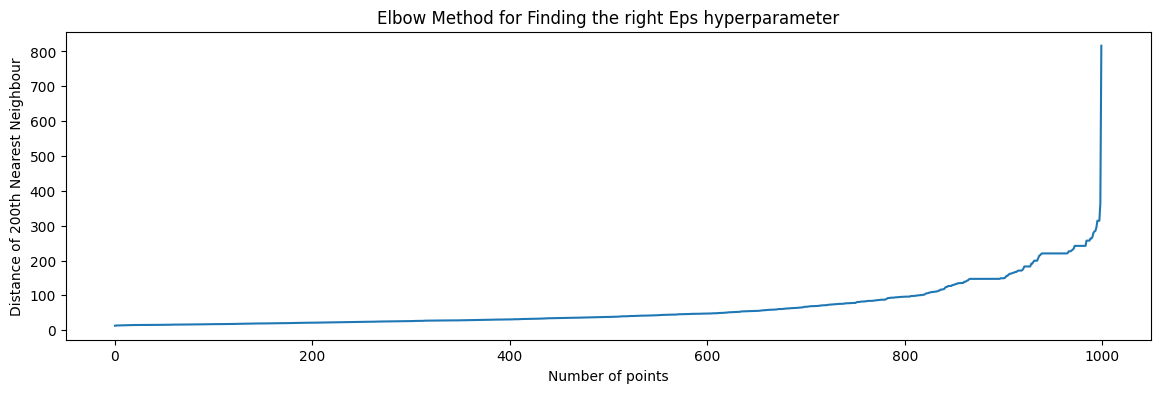

In [ ]:
# Computing the 200th nearest neighbour distance of some point the dataset:
twohundrethneigh = []
for val in vectors[:1000]:
    twohundrethneigh.append( compute200thnearestneighbour(val, vectors[:1000]) )
twohundrethneigh.sort()
# Plotting for the Elbow Method :
%matplotlib inline
from matplotlib import pyplot as plt
plt.figure(figsize=(14,4))
plt.title("Elbow Method for Finding the right Eps hyperparameter")
plt.plot([x for x in range(len(twohundrethneigh))], twohundrethneigh)
plt.xlabel("Number of points")
plt.ylabel("Distance of 200th Nearest Neighbour")
plt.show()

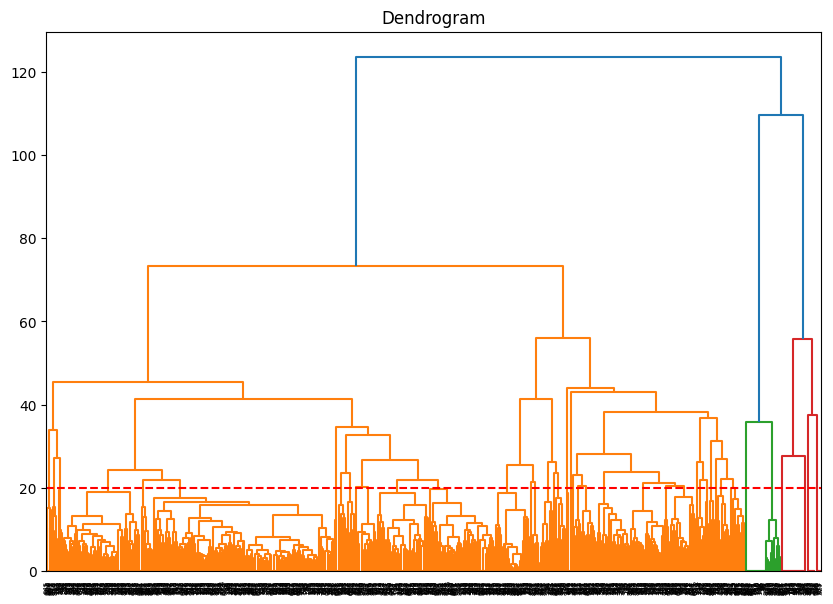

In [ ]:
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as shc

# Hierarchical clustering with a sample of the data
sample_vectors = vectors[:1000]  # Sample size can be adjusted as needed
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dend = shc.dendrogram(shc.linkage(sample_vectors, method='ward'))
plt.axhline(y=20, color='r', linestyle='--')


In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.

In [ ]:
#You can write you answer here. (No code needed)

#The distance between the data points and the cluster centroids provides the basis for K-means clustering. Density-based clustering is carried out using DBSCAN. Here, the regions with the highest concentration of points are identified and separated from empty space.
#As its name implies, hierarchical clustering incorporates layer-by-layer clustering. Finding the two clusters that are closest to one another comes first, treating each data point # as a separate cluster. Word2Vec is an embedding technique that captures semantic similarity among words, making it useful for grouping text data based on semantic content,
#but it may not handle fine-grained clustering well. BERT, a state-of-the-art deep learning model, can provide highly context-aware embeddings, enabling it to capture nuanced relationships in text data, but it often requires substantial computational resources. The choice of clustering method should be based on the specific characteristics of the data and the desired clustering outcome
